## Simple Regression Exercise

In [1]:
from google.colab import drive
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la

# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.

In [2]:
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.

In [3]:
def standardize(X, mean, std):
    S = (X - mean) / std
    return S

# Read data matrix X and labels t from text file.

In [4]:
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]
    t = data[:, -1]
    return X, t

# Implement gradient descent algorithm to compute w = [w0, w1].

In [24]:
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        grad = compute_gradient(X, t, w)
        w -= eta * grad
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
            print(f'Epoch {epoch}: Cost = {cost}')
    costs.append(cost)
    ep.append(epochs - 1)
    return w, ep, costs

# Compute RMSE on dataset (X, t).

In [6]:
def compute_rmse(X, t, w):
    y_pred = np.dot(X, w)
    rmse = np.sqrt(np.mean((y_pred - t)**2))
    return rmse

# Compute objective function (cost) on dataset (X, t).

In [7]:
def compute_cost(X, t, w):
    y_pred = np.dot(X, w)
    cost = 0.5 * np.mean((y_pred - t)**2)
    return cost

# Compute gradient of the objective function (cost) on dataset (X, t).

In [26]:
def compute_gradient(X, t, w):
    N = len(X)
    grad = np.dot(X.T, (np.dot(X, w) - t)) / N
    return grad

# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1].

In [9]:
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(len(X)):
            rand_idx = np.random.randint(len(X))
            xi = X[rand_idx]
            ti = t[rand_idx]
            grad = compute_gradient(xi.reshape(1, -1), ti, w)
            w -= eta * grad
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w, ep, costs


##======================= Main program =======================##


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0: Cost = 31801147978.220097
Epoch 10: Cost = 5669986322.805367
Epoch 20: Cost = 2493047108.1746836
Epoch 30: Cost = 2106805466.6222937
Epoch 40: Cost = 2059847499.9787848
Epoch 50: Cost = 2054138507.4878914
Epoch 60: Cost = 2053444427.2797663
Epoch 70: Cost = 2053360043.3300447
Epoch 80: Cost = 2053349784.2117367
Epoch 90: Cost = 2053348536.9424536
Epoch 100: Cost = 2053348385.303627
Epoch 110: Cost = 2053348366.8678858
Epoch 120: Cost = 2053348364.62653
Epoch 130: Cost = 2053348364.3540332
Epoch 140: Cost = 2053348364.3209043
Epoch 150: Cost = 2053348364.3168764
Epoch 160: Cost = 2053348364.3163867
Epoch 170: Cost = 2053348364.3163269
Epoch 180: Cost = 2053348364.3163202
Epoch 190: Cost = 2053348364.3163192
Params GD:  [254449.99982048  93308.92004027]
Params SGD:  [276581.05968546 105045.03207821]
Training RMSE: 64083.51.
Training cost: 2053348364.32

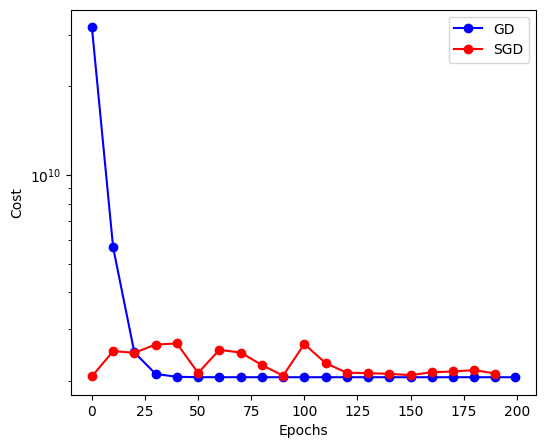

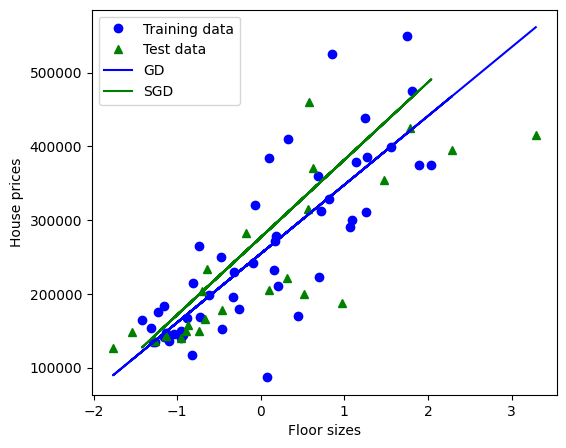

In [31]:
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
train_file_path = '/content/drive/My Drive/data/simple/train.txt'
test_file_path = '/content/drive/My Drive/data/simple/test.txt'

# Read the training and test data.
Xtrain, ttrain = read_data(train_file_path)
Xtest, ttest = read_data(test_file_path)

# Standardize the training and test features using the mean and std computed over *training*.
mean, std = mean_std(Xtrain)
Xtrain = np.hstack((np.ones((Xtrain.shape[0], 1)), standardize(Xtrain, mean, std)))
Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), standardize(Xtest, mean, std)))

# Computing parameters for each training method for eta=0.1 and 200 epochs
eta = 0.1
epochs = 200

w, eph, costs = train(Xtrain, ttrain, eta, epochs)
wsgd, ephsgd, costssgd = train_SGD(Xtrain, ttrain, eta, epochs)

# Print model parameters.
print('Params GD: ', w)
print('Params SGD: ', wsgd)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain, ttrain, w))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest, ttest, w))

# Plotting epochs vs. cost for gradient descent methods
plt.figure(figsize=(6, 5))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph, costs, 'bo-', label='GD')
plt.plot(ephsgd, costssgd , 'ro-', label='SGD')
plt.legend()
plt.savefig('epochs_vs_cost.png')
plt.show()

# Plotting floor size vs. house price
plt.figure(figsize=(6, 5))
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtest[:, 1], np.dot(Xtest, w), 'b', label='GD')
plt.plot(Xtrain[:, 1], wsgd[0] + wsgd[1] * Xtrain[:, 1], 'g', label='SGD')
plt.legend()
plt.savefig('floor_size_vs_house_price.png')
plt.show()